In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
import statsmodels.api as sm
%matplotlib inline 
#notebook use only

df = pd.read_csv(r'C:\Users\Yudhistira\Desktop\namanya juga belajar\proyek\life-expectancy-who\Life Expectancy Data.csv')


AxesSubplot(0.125,0.125;0.698618x0.755)
(2938, 22)


,Year,Life_expectancy,Adult_Mortality,Infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_B,Measles,BMI,Under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Thinness_1_19_years,Thinness_5_9_years,Income_composition_of_resources,Schooling
count,2938.000000,2928.000000,2927.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.760164,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.297806,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,227.500000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


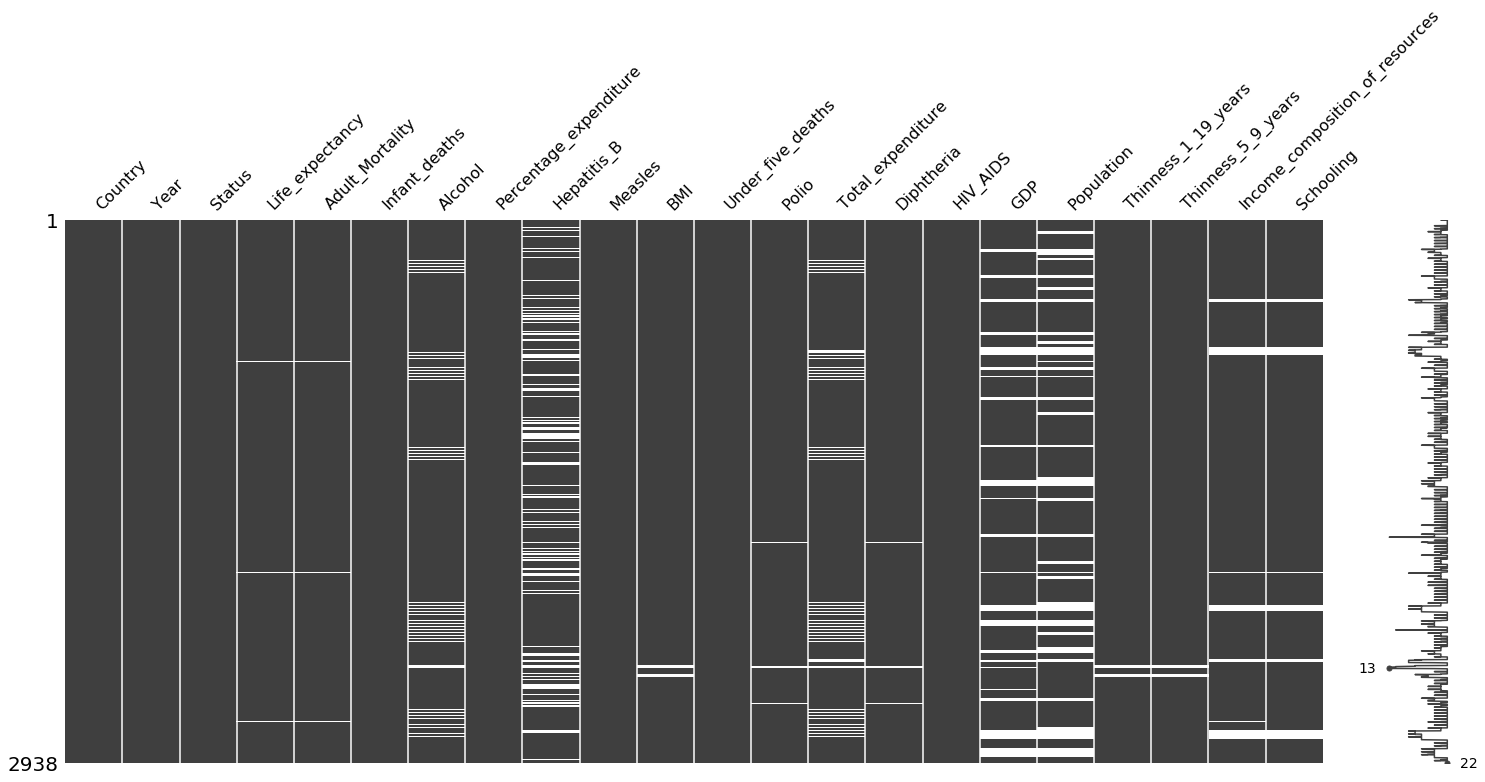

In [2]:
#jumlah row n column+missing data
import missingno as msno
print(msno.matrix(df))

print(df.shape)

df.describe()

In [3]:
#cleaning data
print(df.isnull().any())
print(df.isnull().sum())

Country                            False
Year                               False
Status                             False
Life_expectancy                     True
Adult_Mortality                     True
Infant_deaths                      False
Alcohol                             True
Percentage_expenditure             False
Hepatitis_B                         True
Measles                            False
BMI                                 True
Under_five_deaths                  False
Polio                               True
Total_expenditure                   True
Diphtheria                          True
HIV_AIDS                           False
GDP                                 True
Population                          True
Thinness_1_19_years                 True
Thinness_5_9_years                  True
Income_composition_of_resources     True
Schooling                           True
dtype: bool
Country                              0
Year                                 0
Status  

In [4]:
#cleaning data
df = df.drop(['Hepatitis_B', 'GDP', 'Population', 'Total_expenditure'], axis=1)
#column yg banyak missingnya drop aja

Country                            False
Year                               False
Status                             False
Life_expectancy                    False
Adult_Mortality                    False
Infant_deaths                      False
Alcohol                            False
Percentage_expenditure             False
Measles                            False
BMI                                False
Under_five_deaths                  False
Polio                              False
Diphtheria                         False
HIV_AIDS                           False
Thinness_1_19_years                False
Thinness_5_9_years                 False
Income_composition_of_resources    False
Schooling                          False
dtype: bool
Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult_Mortality                    0
Infant_deaths                      0
Alcohol                     

,Year,Life_expectancy,Adult_Mortality,Infant_deaths,Alcohol,Percentage_expenditure,Measles,BMI,Under_five_deaths,Polio,Diphtheria,HIV_AIDS,Thinness_1_19_years,Thinness_5_9_years,Income_composition_of_resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.195643,164.813819,30.303948,4.607270,738.251295,2419.592240,38.020150,42.035739,82.307692,82.075221,1.742103,4.955956,5.002553,0.631418,11.935671
std,4.613841,9.536654,124.431511,117.926501,4.044785,1987.914858,11467.272489,20.175077,160.445548,23.636677,23.917022,5.077785,4.541403,4.670154,0.210920,3.340202
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,0.000000,1.000000,0.000000,3.000000,2.000000,0.100000,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.025000,74.000000,0.000000,0.880000,4.685343,0.000000,19.000000,0.000000,77.000000,78.000000,0.100000,1.600000,1.600000,0.494000,10.100000
50%,2008.000000,72.000000,144.000000,3.000000,3.765000,64.912906,17.000000,43.000000,4.000000,93.000000,93.000000,0.100000,3.400000,3.400000,0.684000,12.300000
75%,2012.000000,75.600000,228.000000,22.000000,7.665000,441.534144,360.250000,56.100000,28.000000,97.000000,97.000000,0.800000,7.300000,7.300000,0.791000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,212183.000000,87.300000,2500.000000,99.000000,99.000000,50.600000,27.700000,28.600000,0.948000,20.700000


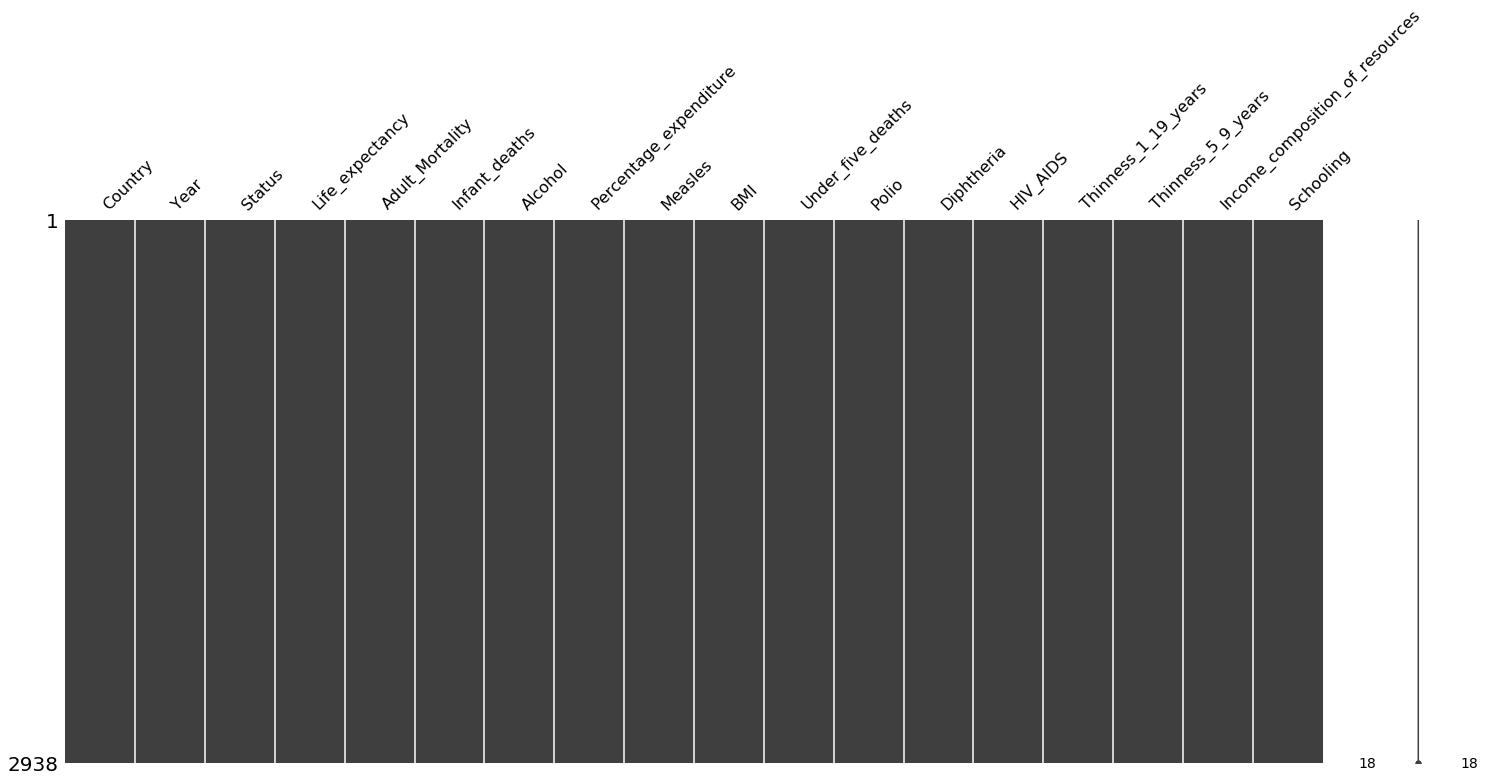

In [5]:
df = df.fillna(method = 'ffill') #coba cari cara lain

#after cleaning
print(df.isnull().any())
print(df.isnull().sum())
print(msno.matrix(df))
df.describe()

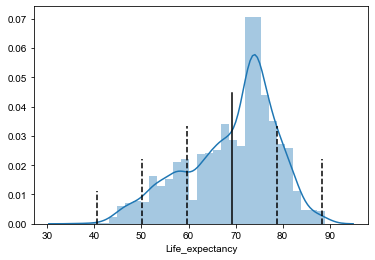

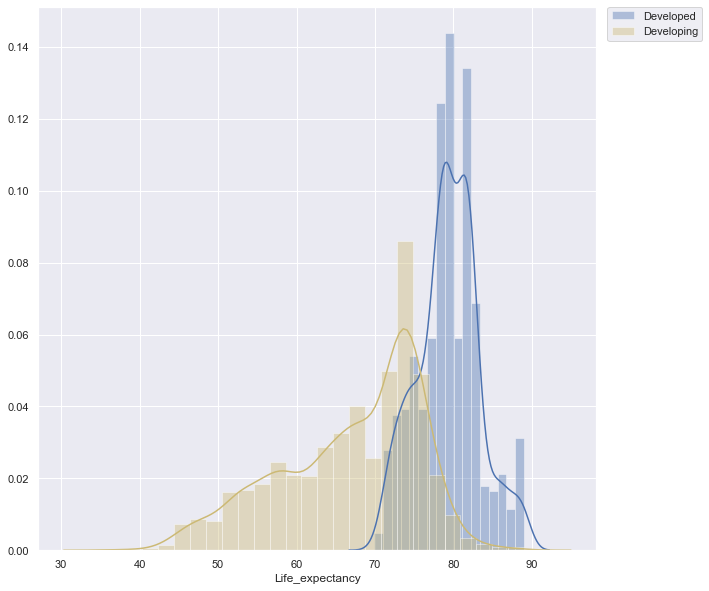

In [6]:
#Life Expectancy visualisasi 
sb.distplot(df['Life_expectancy'])
plt.axvline(df['Life_expectancy'].mean(),0,.6,color='black')
plt.axvline(df['Life_expectancy'].mean()+df['Life_expectancy'].std(),0,.45,color='black',linestyle='--')
plt.axvline(df['Life_expectancy'].mean()-df['Life_expectancy'].std(),0,.45,color='black',linestyle='--')
plt.axvline(df['Life_expectancy'].mean()+2*df['Life_expectancy'].std(),0,.30,color='black',linestyle='--')
plt.axvline(df['Life_expectancy'].mean()-2*df['Life_expectancy'].std(),0,.30,color='black',linestyle='--')
plt.axvline(df['Life_expectancy'].mean()-3*df['Life_expectancy'].std(),0,.15,color='black',linestyle='--')
sb.set(rc={'figure.figsize':(10,10)})
plt.show()

#Life Expectancy based on negara maju(developed) or berkembang(developing) 
sb.distplot(df[df['Status']=='Developed']['Life_expectancy'])
sb.distplot(df[df['Status']=='Developing']['Life_expectancy'],color='y')
labels=['Developed','Developing']
plt.legend(labels=labels,bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
sb.set(rc={'figure.figsize':(10,10)})
plt.show()

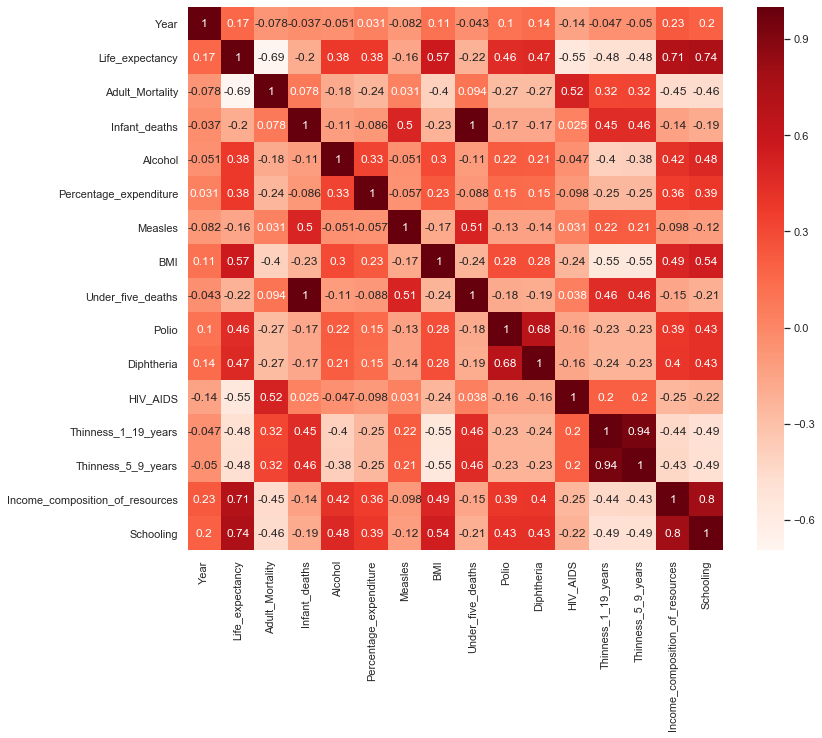

In [7]:
#pearson correlation, makin deket ke 1, makin relate
plt.figure(figsize=(12,10))
cor = df.corr()
sb.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [8]:
#coba cara lain untuk nyari korelasi
cor_target = abs(cor['Life_expectancy'])

relev_features = cor_target[cor_target>0.5]
relev_features

Life_expectancy                    1.000000
Adult_Mortality                    0.694693
BMI                                0.567361
HIV_AIDS                           0.553770
Income_composition_of_resources    0.705641
Schooling                          0.736323
Name: Life_expectancy, dtype: float64

In [9]:
print(df[['Adult_Mortality', 'BMI']].corr())
print(df[['Adult_Mortality', 'HIV_AIDS']].corr())
print(df[['Adult_Mortality', 'Schooling']].corr())
print(df[['HIV_AIDS', 'BMI']].corr())
print(df[['Schooling', 'BMI']].corr())
print(df[['HIV_AIDS', 'Schooling']].corr())
#hasil yg correlate AM & Schooling

                 Adult_Mortality       BMI
Adult_Mortality         1.000000 -0.395772
BMI                    -0.395772  1.000000
                 Adult_Mortality  HIV_AIDS
Adult_Mortality         1.000000  0.522204
HIV_AIDS                0.522204  1.000000
                 Adult_Mortality  Schooling
Adult_Mortality         1.000000  -0.458012
Schooling              -0.458012   1.000000
          HIV_AIDS       BMI
HIV_AIDS  1.000000 -0.242466
BMI      -0.242466  1.000000
           Schooling       BMI
Schooling   1.000000  0.543982
BMI         0.543982  1.000000
           HIV_AIDS  Schooling
HIV_AIDS   1.000000  -0.220465
Schooling -0.220465   1.000000


In [10]:
#labeling
X = df[['Schooling', 'Adult_Mortality']].values
y = df['Life_expectancy'].values

In [11]:
#train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


score: 0.6652942527715493


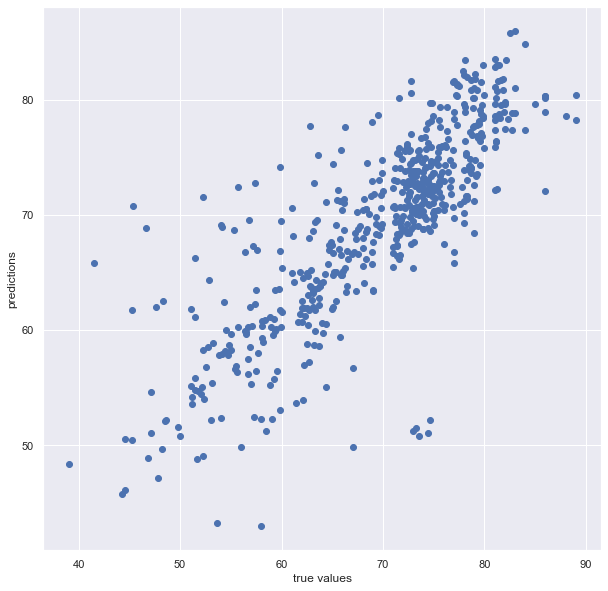

In [12]:
#prediction
predictions = lm.predict(X_test)


#regresi model
plt.scatter(y_test, predictions)
plt.xlabel("true values")
plt.ylabel("predictions")


print("score:", model.score(X_test, y_test))